In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('simulation_190815/sim_1/output/bic_df.csv', index_col=0)

In [3]:
bic_diff = df['global'] - df['local']

In [4]:
df['bic'] = True
df.loc[bic_diff < 0, 'bic'] = False

In [5]:
df.drop(['global', 'local'], axis = 1, inplace=True)

In [6]:
for i in range(2, 101):
    new_df = pd.read_csv('simulation_190815/sim_{}/output/bic_df.csv'.format(i), index_col=0)
    new_bic_diff = new_df['global'] - new_df['local']
    new_df['bic'] = True
    new_df.loc[new_bic_diff < 0, 'bic'] = False
    bic_diff = pd.concat([bic_diff, new_bic_diff], axis=1)
    df = pd.concat([df, new_df['bic']], axis=1)

In [7]:
bic_diff['value'] = bic_diff.mean(axis = 1)
df['ratio'] = df.sum(axis = 1)

In [8]:
df.drop(['bic'], axis = 1, inplace=True)

In [9]:
pi = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0]
beta_1 = [0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.075, 0.1]

In [10]:
bic_diff['pi'] = sorted(pi * len(beta_1))
df['pi'] = sorted(pi * len(beta_1))

In [11]:
bic_diff['beta_1'] = beta_1 * len(pi)
df['beta_1'] = beta_1 * len(pi)

In [12]:
bic_diff = bic_diff.pivot(index='pi', columns='beta_1', values='value')
df = df.pivot(index='pi', columns='beta_1', values='ratio')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

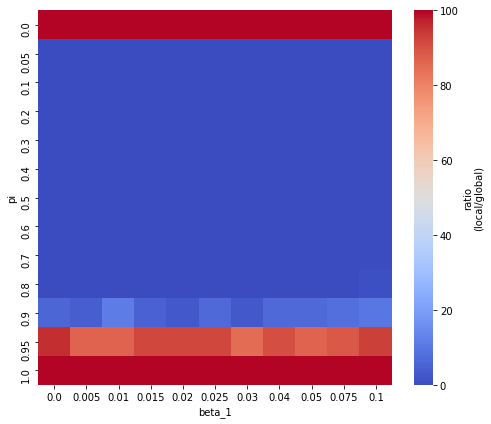

In [14]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(df, cmap='coolwarm', cbar_kws={'label': 'ratio\n(local/global)'})
plt.tight_layout()
# plt.savefig('sim_bic_classify.png')

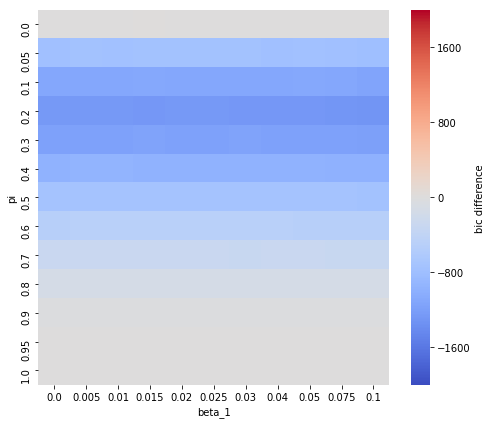

In [16]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(bic_diff, vmin=-2000, vmax=2000, cmap='coolwarm', cbar_kws={'label': 'bic difference'})
plt.tight_layout()
# plt.savefig('sim_bic_difference.png')